In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
path = "datasets/RAJASTHAN.csv"
df = pd.read_csv(path, skiprows=13)
# header ignored

In [4]:
df

,LAT,LON,YEAR,MO,DY,ALLSKY_KT,T2M,QV2M,PRECTOTCORR,PS
0,24.75,70.75,2023,1,1,0.64,17.50,3.61,0.0,101.20
1,24.75,71.25,2023,1,1,0.66,17.17,3.54,0.0,101.36
2,24.75,71.75,2023,1,1,0.66,17.15,3.32,0.0,100.92
3,24.75,72.25,2023,1,1,0.66,16.63,3.03,0.0,99.67
4,24.75,72.75,2023,1,1,0.66,16.21,2.72,0.0,98.17
...,...,...,...,...,...,...,...,...,...,...
26347,28.25,72.75,2024,1,1,-999.00,11.81,5.46,0.0,99.81
26348,28.25,73.25,2024,1,1,-999.00,11.53,5.69,0.0,99.39
26349,28.25,73.75,2024,1,1,-999.00,11.33,5.86,0.0,99.07
26350,28.25,74.25,2024,1,1,-999.00,11.25,5.91,0.0,98.76


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26352 entries, 0 to 26351
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LAT          26352 non-null  float64
 1   LON          26352 non-null  float64
 2   YEAR         26352 non-null  int64  
 3   MO           26352 non-null  int64  
 4   DY           26352 non-null  int64  
 5   ALLSKY_KT    26352 non-null  float64
 6   T2M          26352 non-null  float64
 7   QV2M         26352 non-null  float64
 8   PRECTOTCORR  26352 non-null  float64
 9   PS           26352 non-null  float64
dtypes: float64(7), int64(3)
memory usage: 2.0 MB


In [6]:
df.describe()

,LAT,LON,YEAR,MO,DY,ALLSKY_KT,T2M,QV2M,PRECTOTCORR,PS
count,26352.000000,26352.000000,26352.000000,26352.000000,26352.000000,26352.000000,26352.000000,26352.000000,26352.000000,26352.000000
mean,26.500000,72.750000,2023.002732,6.510929,15.680328,-165.997241,26.208749,10.558101,1.687811,97.994114
std,1.145666,1.291019,0.052200,3.455265,8.817934,372.537241,6.038080,5.893141,6.029853,1.431167
min,24.750000,70.750000,2023.000000,1.000000,1.000000,-999.000000,9.060000,0.820000,0.000000,93.390000
25%,25.625000,71.750000,2023.000000,4.000000,8.000000,0.450000,22.000000,5.490000,0.000000,97.060000
50%,26.500000,72.750000,2023.000000,7.000000,16.000000,0.610000,27.500000,8.760000,0.000000,98.130000
75%,27.375000,73.750000,2023.000000,10.000000,23.000000,0.670000,30.772500,16.080000,0.352500,99.040000
max,28.250000,74.750000,2024.000000,12.000000,31.000000,0.800000,38.200000,23.550000,162.280000,101.480000


In [7]:
df['ALLSKY_KT'].value_counts()

ALLSKY_KT
-999.00    4392
 0.66      1687
 0.70      1616
 0.62      1322
 0.67      1081
           ... 
 0.09         3
 0.13         3
 0.15         2
 0.14         2
 0.17         2
Name: count, Length: 75, dtype: int64

In [8]:
outliers = (df['ALLSKY_KT'] == -999)

In [9]:
dfcpy = df.copy()

In [10]:
dfcpy.drop(dfcpy[outliers].index, inplace=True)

In [11]:
dfcpy

,LAT,LON,YEAR,MO,DY,ALLSKY_KT,T2M,QV2M,PRECTOTCORR,PS
0,24.75,70.75,2023,1,1,0.64,17.50,3.61,0.0,101.20
1,24.75,71.25,2023,1,1,0.66,17.17,3.54,0.0,101.36
2,24.75,71.75,2023,1,1,0.66,17.15,3.32,0.0,100.92
3,24.75,72.25,2023,1,1,0.66,16.63,3.03,0.0,99.67
4,24.75,72.75,2023,1,1,0.66,16.21,2.72,0.0,98.17
...,...,...,...,...,...,...,...,...,...,...
21955,28.25,72.75,2023,11,1,0.61,27.14,7.22,0.0,99.48
21956,28.25,73.25,2023,11,1,0.59,26.56,7.46,0.0,99.09
21957,28.25,73.75,2023,11,1,0.59,26.04,7.78,0.0,98.80
21958,28.25,74.25,2023,11,1,0.57,25.51,7.98,0.0,98.52


In [12]:
dfcpy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21960 entries, 0 to 21959
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LAT          21960 non-null  float64
 1   LON          21960 non-null  float64
 2   YEAR         21960 non-null  int64  
 3   MO           21960 non-null  int64  
 4   DY           21960 non-null  int64  
 5   ALLSKY_KT    21960 non-null  float64
 6   T2M          21960 non-null  float64
 7   QV2M         21960 non-null  float64
 8   PRECTOTCORR  21960 non-null  float64
 9   PS           21960 non-null  float64
dtypes: float64(7), int64(3)
memory usage: 1.7 MB


In [13]:
dfcpy.describe()

,LAT,LON,YEAR,MO,DY,ALLSKY_KT,T2M,QV2M,PRECTOTCORR,PS
count,21960.00000,21960.000000,21960.0,21960.000000,21960.000000,21960.000000,21960.000000,21960.000000,21960.000000,21960.000000
mean,26.50000,72.750000,2023.0,5.544262,15.665574,0.603311,27.412253,11.397075,1.991163,97.863902
std,1.14567,1.291024,0.0,2.883400,8.820053,0.109043,5.727421,6.075187,6.510224,1.410747
min,24.75000,70.750000,2023.0,1.000000,1.000000,0.060000,9.060000,0.820000,0.000000,93.390000
25%,25.62500,71.750000,2023.0,3.000000,8.000000,0.550000,25.250000,5.740000,0.000000,96.940000
50%,26.50000,72.750000,2023.0,6.000000,16.000000,0.630000,28.560000,10.655000,0.000000,97.990000
75%,27.37500,73.750000,2023.0,8.000000,23.000000,0.680000,31.360000,17.152500,0.740000,98.870000
max,28.25000,74.750000,2023.0,11.000000,31.000000,0.800000,38.200000,23.550000,162.280000,101.480000


In [20]:
dfcpy

,LAT,LON,YEAR,MO,DY,ALLSKY_KT,T2M,QV2M,PRECTOTCORR,PS
0,24.75,70.75,2023,1,1,0.64,17.50,3.61,0.0,101.20
1,24.75,71.25,2023,1,1,0.66,17.17,3.54,0.0,101.36
2,24.75,71.75,2023,1,1,0.66,17.15,3.32,0.0,100.92
3,24.75,72.25,2023,1,1,0.66,16.63,3.03,0.0,99.67
4,24.75,72.75,2023,1,1,0.66,16.21,2.72,0.0,98.17
...,...,...,...,...,...,...,...,...,...,...
21955,28.25,72.75,2023,11,1,0.61,27.14,7.22,0.0,99.48
21956,28.25,73.25,2023,11,1,0.59,26.56,7.46,0.0,99.09
21957,28.25,73.75,2023,11,1,0.59,26.04,7.78,0.0,98.80
21958,28.25,74.25,2023,11,1,0.57,25.51,7.98,0.0,98.52


In [83]:
df[['LAT', 'LON']].value_counts()

LAT    LON  
24.75  70.75    366
       71.25    366
27.25  74.25    366
       73.75    366
       73.25    366
               ... 
25.75  73.25    366
       72.75    366
       72.25    366
       71.75    366
28.25  74.75    366
Name: count, Length: 72, dtype: int64

Text(0, 0.5, 'LATITUDE')

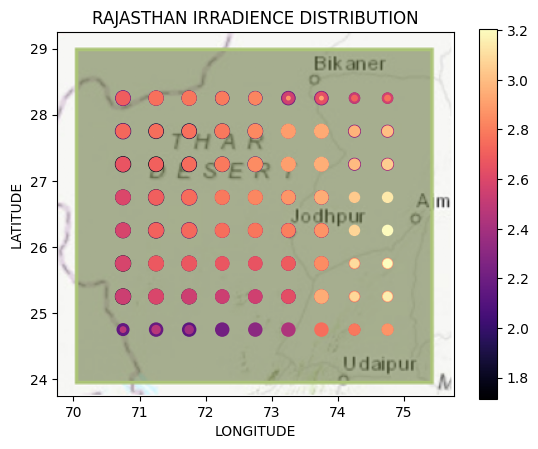

In [86]:
plt.scatter(dfcpy['LON'][:366], dfcpy['LAT'][:366], s=X[:366, 0]*100, c=-X[:366, 1], cmap='magma')
img = plt.imread('datasets/rajasthan_pic.png')
plt.colorbar()
plt.imshow(img, extent=[dfcpy['LON'].min()-1, dfcpy['LON'].max()+1, dfcpy['LAT'].min()-1, dfcpy['LAT'].max()+1])
plt.title('RAJASTHAN IRRADIENCE DISTRIBUTION')
plt.xlabel('LONGITUDE')
plt.ylabel('LATITUDE')

In [64]:
cols = ["YEAR","MO","DY"]
dfcpy['DATE'] = dfcpy[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
	
dfcpy['DATE'] = pd.to_datetime(dfcpy['DATE'])
dfcpy.drop(columns=cols, inplace=True)

In [65]:
dfcpy

,LAT,LON,ALLSKY_KT,T2M,QV2M,PRECTOTCORR,PS,DATE
0,24.75,70.75,0.64,17.50,3.61,0.0,101.20,2023-01-01
1,24.75,71.25,0.66,17.17,3.54,0.0,101.36,2023-01-01
2,24.75,71.75,0.66,17.15,3.32,0.0,100.92,2023-01-01
3,24.75,72.25,0.66,16.63,3.03,0.0,99.67,2023-01-01
4,24.75,72.75,0.66,16.21,2.72,0.0,98.17,2023-01-01
...,...,...,...,...,...,...,...,...
21955,28.25,72.75,0.61,27.14,7.22,0.0,99.48,2023-11-01
21956,28.25,73.25,0.59,26.56,7.46,0.0,99.09,2023-11-01
21957,28.25,73.75,0.59,26.04,7.78,0.0,98.80,2023-11-01
21958,28.25,74.25,0.57,25.51,7.98,0.0,98.52,2023-11-01


In [72]:
(df['ALLSKY_KT'][:21960]<0).any()

False